In [1]:
# cnn model for image classification
from tensorflow.keras import layers,models,datasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 1.CNN for CIFAR10 Dataset

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 100s 1us/step


In [3]:
len(x_train)

50000

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
# convert into 1 d array
y_train = y_train.reshape(-1,) 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat" ,"deer" ,"dog" ,"frog" ,"horse", "ship","truck"]

In [15]:
def plot_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

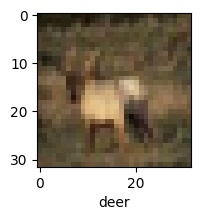

In [16]:
plot_image(x_train,y_train,3)

In [17]:
# normalize data
x_train = x_train / 255
x_test = x_test / 255

In [28]:
# train using ann
model = tf.keras.Sequential()

model.add(layers.Flatten(input_shape=(32,32,3)))

model.add(layers.Dense(3000,activation='relu'))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))

model.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.3025 - loss: 1.9372
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4188 - loss: 1.6462
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4490 - loss: 1.5567
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4776 - loss: 1.4887
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.4884 - loss: 1.4410


In [33]:
y_test = y_test.reshape(-1,)

In [35]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [37]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4594 - loss: 1.5250


[1.525543212890625, 0.45660001039505005]

In [40]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(classification_report(y_test,y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.50      0.61      0.55      1000
           1       0.36      0.85      0.51      1000
           2       0.45      0.24      0.32      1000
           3       0.38      0.25      0.30      1000
           4       0.51      0.32      0.39      1000
           5       0.32      0.52      0.39      1000
           6       0.58      0.42      0.49      1000
           7       0.69      0.41      0.51      1000
           8       0.65      0.56      0.60      1000
           9       0.52      0.38      0.44      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



In [43]:
# using convolution networks
cnn = tf.keras.models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPool2D((2,2)),

    #dense layers 
    # no need to define shae of flatten
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3460 - loss: 1.7681
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5879 - loss: 1.1680
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6455 - loss: 1.0205
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6776 - loss: 0.9259
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7021 - loss: 0.8637
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7187 - loss: 0.8101
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7335 - loss: 0.7632
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7504 - loss: 0.7137
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7580 - loss: 0.6870
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7806 - loss: 0.6326


In [45]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6988 - loss: 0.9056


[0.9013094902038574, 0.6988999843597412]

Good accuracy when compared to ann 

In [46]:
y_pred = cnn.predict(x_test)
y_classes = [np.argmax(i) for i in y_pred]
print(classification_report(y_test,y_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.84      0.80      0.82      1000
           2       0.63      0.54      0.58      1000
           3       0.50      0.54      0.52      1000
           4       0.62      0.69      0.65      1000
           5       0.66      0.51      0.57      1000
           6       0.68      0.84      0.75      1000
           7       0.76      0.74      0.75      1000
           8       0.77      0.84      0.80      1000
           9       0.83      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



Improved F-score when compared to ann

### 2.CNN for MNIST dataser

In [49]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [50]:
x_train = x_train / 255
x_test = x_test / 255

In [53]:
x_train.shape

(60000, 28, 28)

In [56]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [57]:
x_train.shape

(60000, 28, 28, 1)

In [59]:
digit_model = models.Sequential([
    #cnn 
    layers.Conv2D(filters = 30 , kernel_size = (3,3), activation = 'relu',input_shape = (28,28,1) ),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 10 , kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPool2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(10,activation='sigmoid')
])

digit_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [60]:
digit_model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8194 - loss: 0.5914
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9721 - loss: 0.0920
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9790 - loss: 0.0671
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9818 - loss: 0.0603
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9844 - loss: 0.0499


In [61]:
digit_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0597


[0.04720186069607735, 0.9847000241279602]

In [63]:
y_pred = digit_model.predict(x_test)
y_pred_names = [np.argmax(i) for i in y_pred]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test , y_pred = y_pred_names)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(50.722222222222214, 0.5, 'Truth')

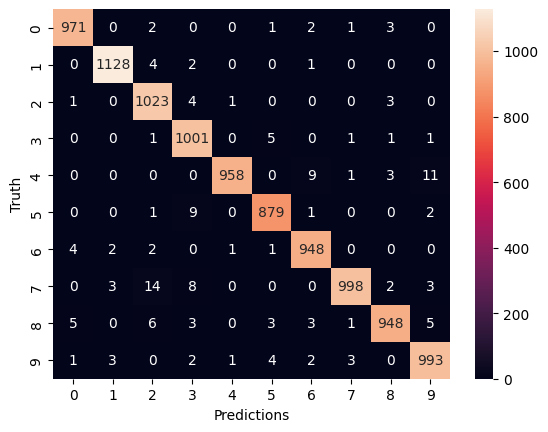

In [68]:
import seaborn as sns
sns.heatmap(cm, annot=True , fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')